# Problem statement : 

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

Attachments area


# Importing Important Libraries

In [139]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from collections import Counter

pd.set_option('max_columns',None)

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from IPython.display import Image
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [140]:
df=pd.read_csv("C:/Users/ASUS/Desktop/PROJECT/csv files/Dataset2-main/Dataset2-main/temperature.csv",index_col='station')
df

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,,,,,,,,,,,,,,,,,,,,,,,,
1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4


In [141]:
df.dtypes

Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

All the columns have float values

In [142]:
df.columns

Index(['Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7752 entries, 1.0 to nan
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7750 non-null   object 
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float

In [144]:
df.isnull().sum()

Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Following columns have no null values , except these columns, every col. has null values :
lat                  
lon                  
DEM                  
Slope                
Solar radiation

<AxesSubplot:ylabel='station'>

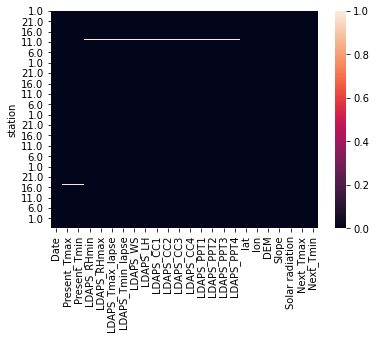

In [145]:
sns.heatmap(df.isnull())

# Extracting month,year and day column from an existing Date column 

In [146]:
df["Month"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y").dt.month

df["Day"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.day

df["Year"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.year


In [147]:
# Since we have converted Date column into integers, Now we can drop as it is of no use.
df.drop(["Date"], axis = 1, inplace = True)

In [148]:
df.tail(10)

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
station,,,,,,,,,,,,,,,,,,,,,,,,,,
18.0,23.3,18.2,30.259682,86.565193,26.474403,17.289157,6.522731,94.203783,0.045451,0.034340,0.000000e+00,0.014070,0.000000,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.231300,4435.611816,27.8,16.7,8.0,30.0,2017.0
19.0,22.6,15.0,25.536045,78.779045,26.596280,17.856040,6.905963,54.030075,0.056634,0.076289,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.767800,4495.473633,27.1,16.6,8.0,30.0,2017.0
20.0,22.7,15.9,38.216373,94.428116,24.037222,15.772677,6.478060,112.580310,0.038019,0.005380,0.000000e+00,0.000938,0.000000,0.000000,0.000000,0.000000,37.6181,127.004,146.5540,4.729600,4554.965332,26.7,16.3,8.0,30.0,2017.0
21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.000000,0.000000,0.000000,0.000000,37.5507,127.040,26.2980,0.572100,4456.024414,27.6,17.7,8.0,30.0,2017.0
22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.000000,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,4441.803711,28.0,17.1,8.0,30.0,2017.0
23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,8.0,30.0,2017.0
24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,8.0,30.0,2017.0
25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000e+00,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,8.0,30.0,2017.0
NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


In [149]:
# we have 7752 rows and 26 columns
df.shape

(7752, 26)

In [150]:
df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
station,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,6.0,30.0,2013.0
2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,6.0,30.0,2013.0
3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,6.0,30.0,2013.0
4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,6.0,30.0,2013.0
5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,6.0,30.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,8.0,30.0,2017.0
24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,8.0,30.0,2017.0
25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,8.0,30.0,2017.0


In [151]:
df.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Month                2
Day                  2
Year                 2
dtype: int64

In [152]:
# making variable collist contains columns values for plotting together all columns
ncol=20
nrows=25
collist=df.columns.values

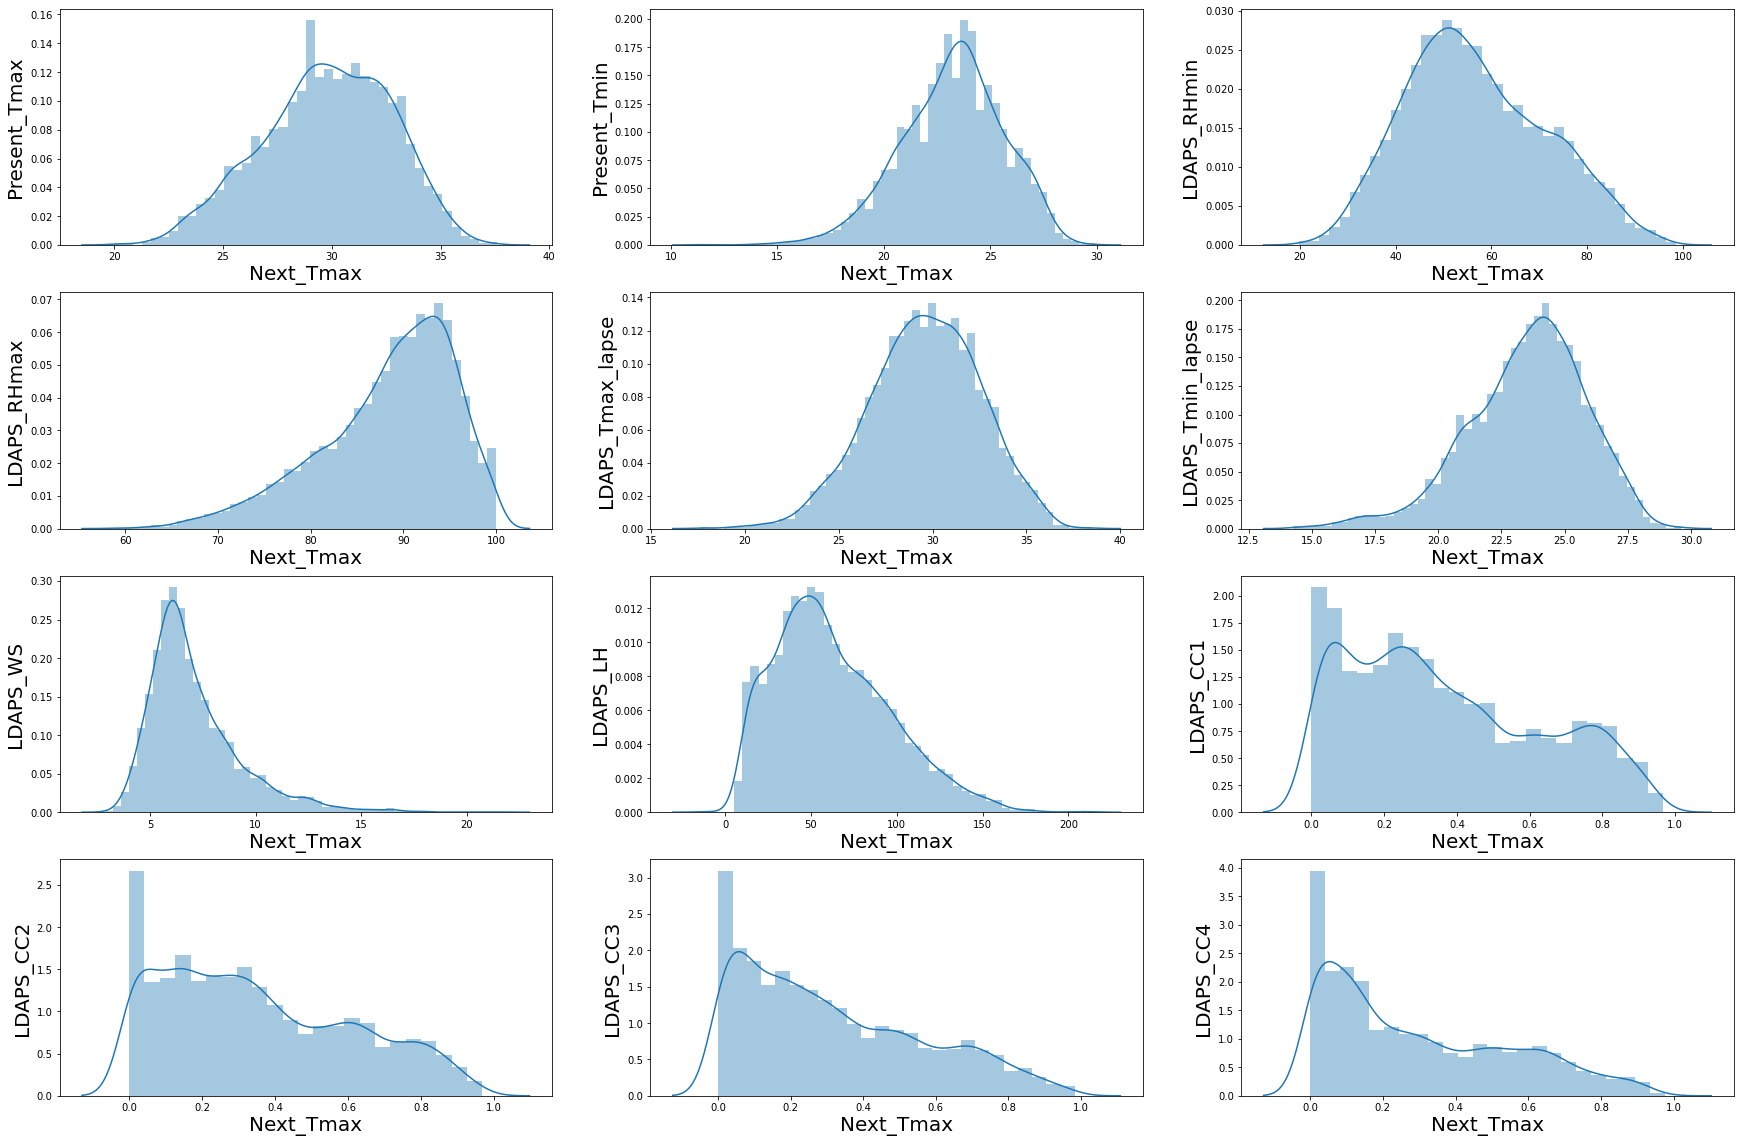

In [153]:
plt.figure(figsize=(30,20),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.ylabel(column,fontsize=20)
        plt.xlabel('Next_Tmax',fontsize=20)
    plotnumber+=1
plt.show()

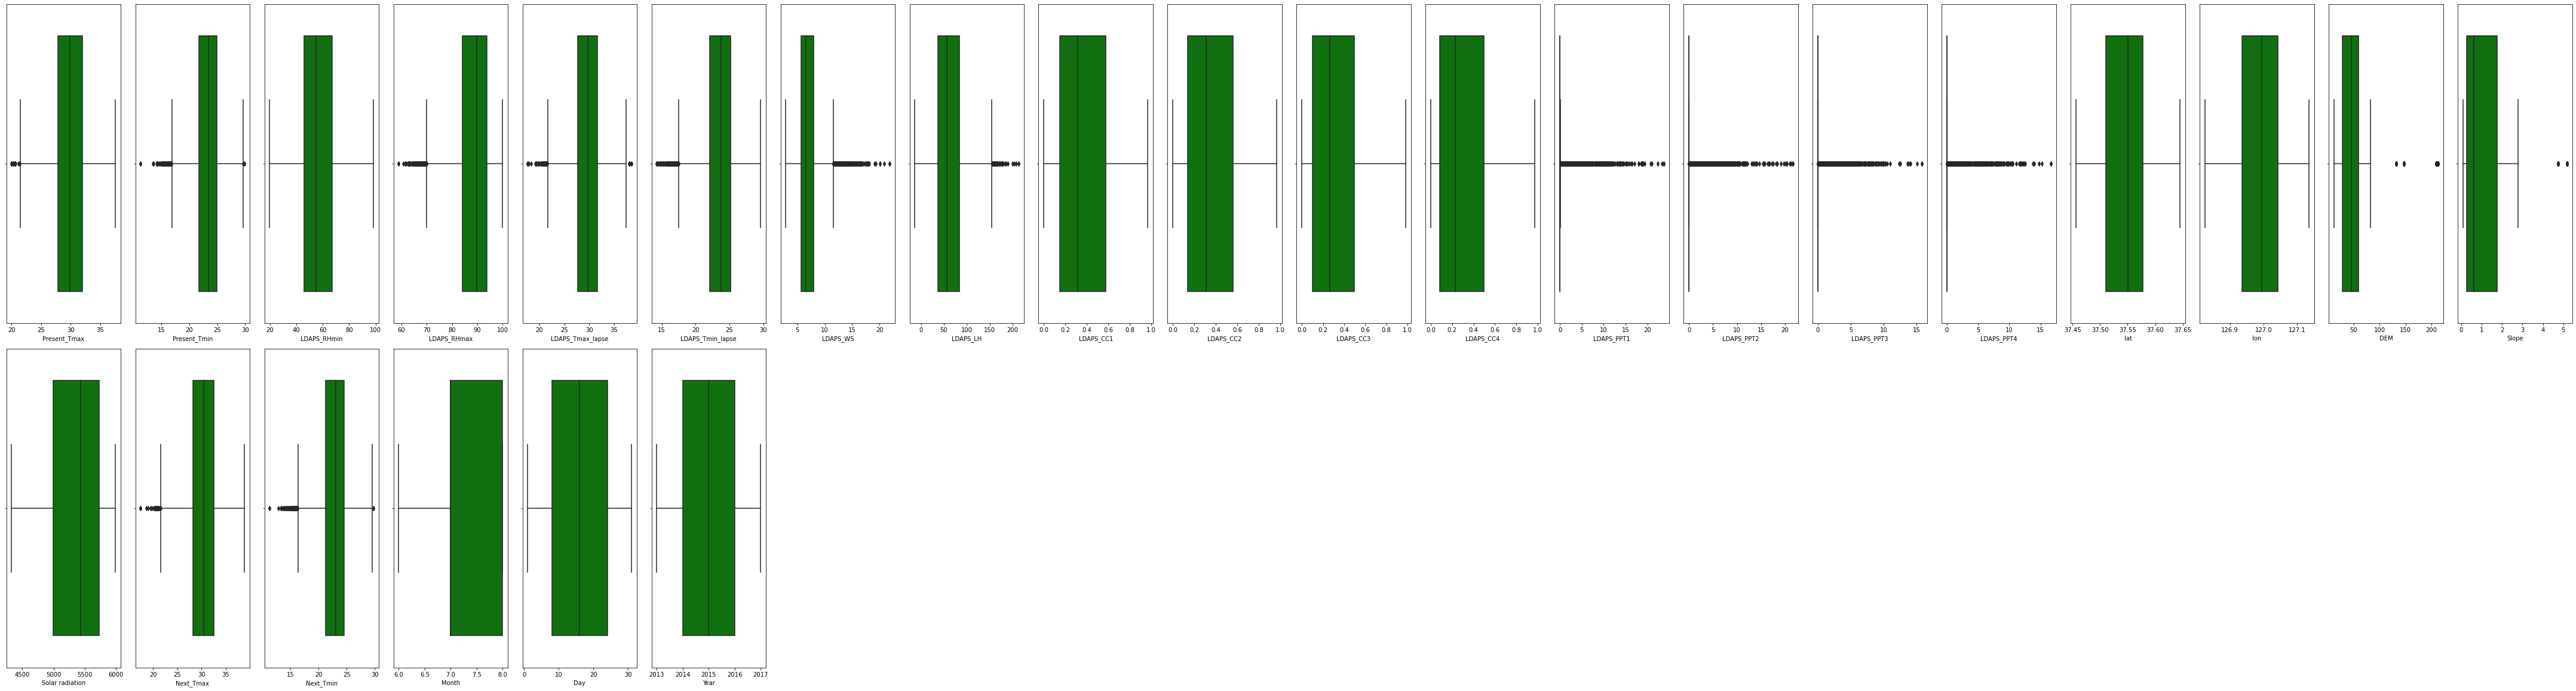

In [154]:
plt.figure(figsize=(3*ncol,10*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

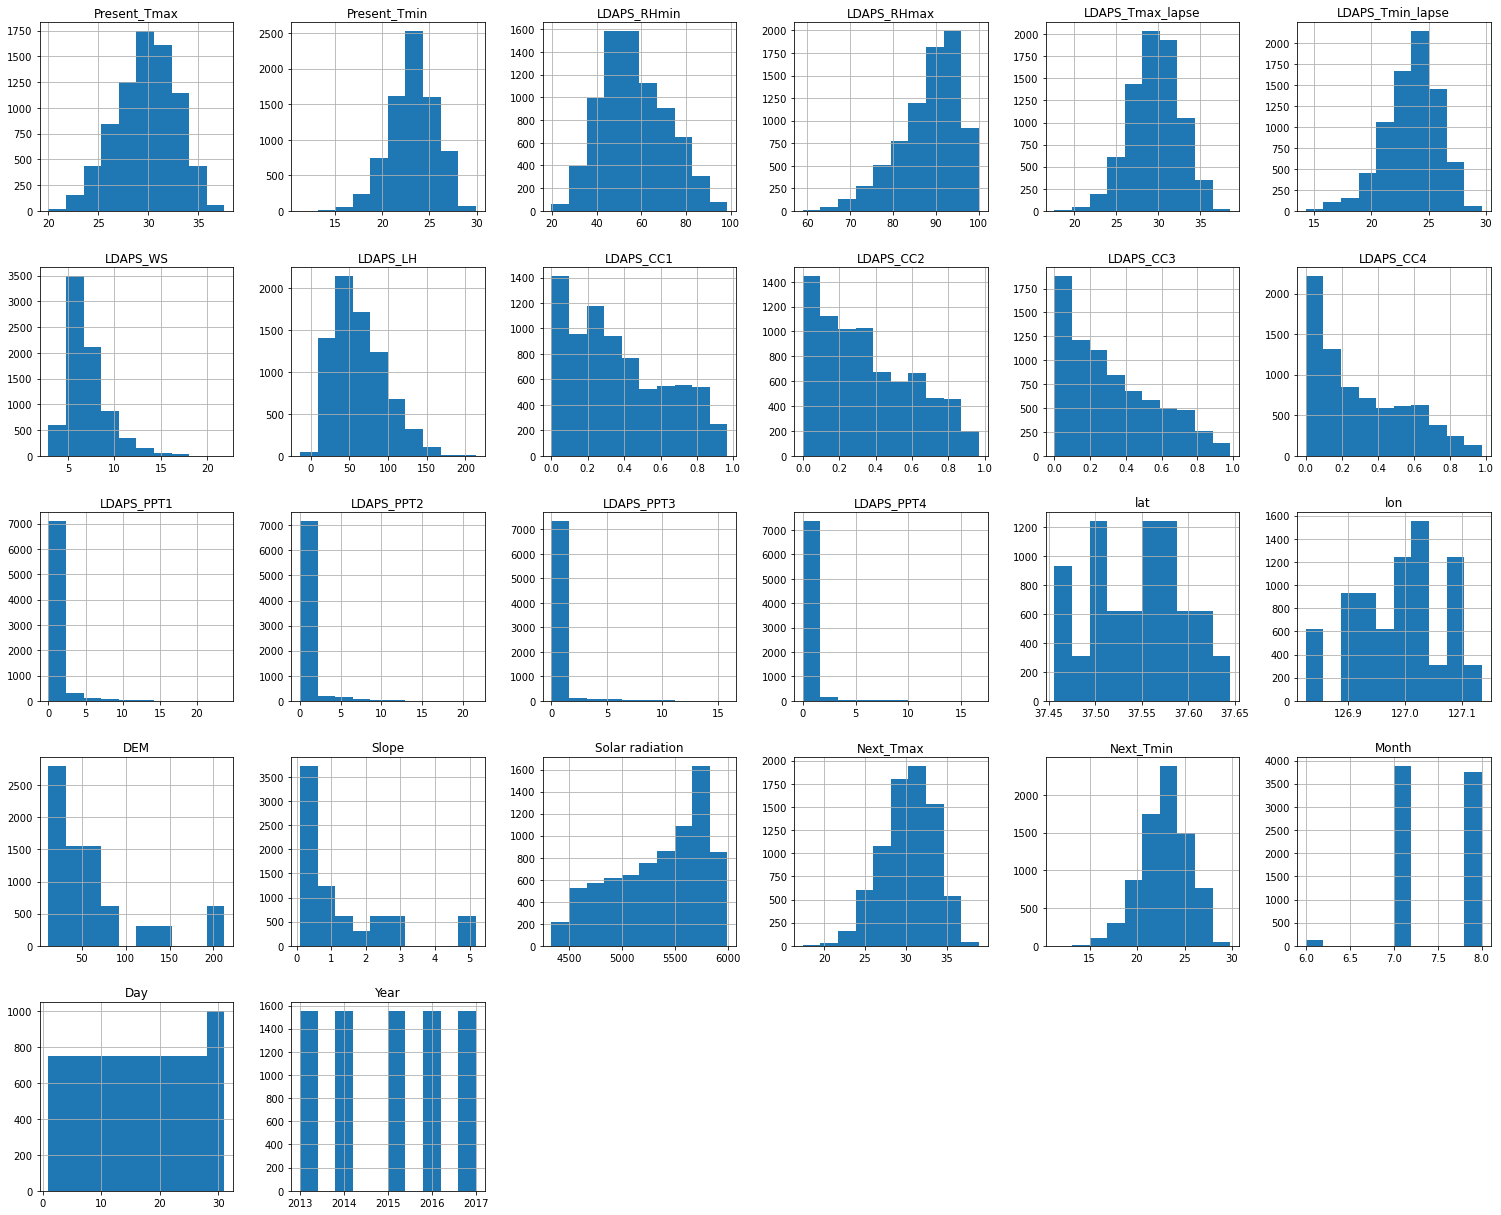

In [155]:
df.hist(figsize=(26,26), layout=(6,6), sharex=False);

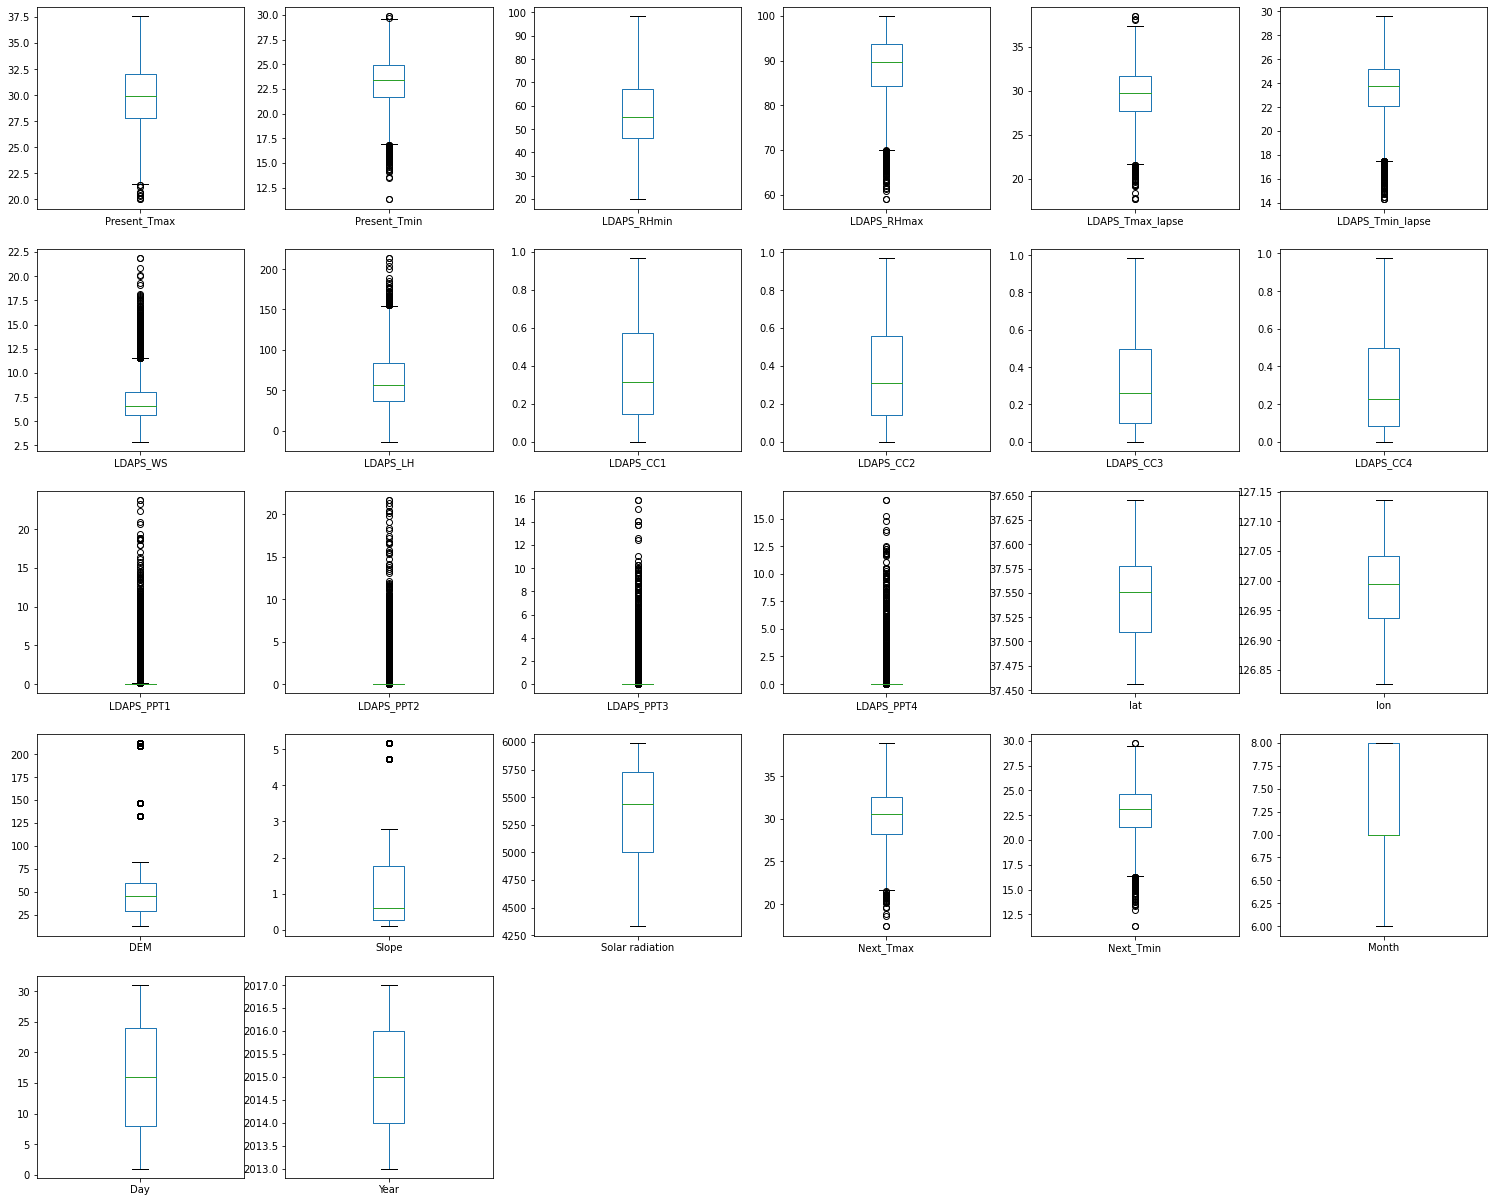

In [156]:
df.plot(kind='box', figsize=(26,26), layout=(6,6), sharex=False, subplots=True);

From the above graph , notice that outliers present in this few columns and need to remove it
Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_RH_max,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,
LDAPS_PPT3,LDAPS_PPT4,DEM,Slope

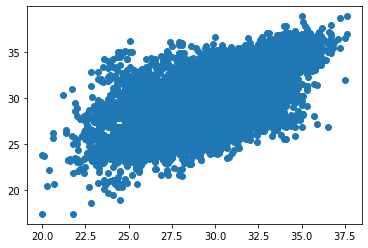

In [157]:
plt.scatter(df['Present_Tmax'],df['Next_Tmax'])

Present_Tmax is directly proportional to target Next_Tmax

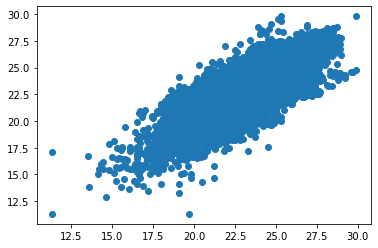

In [158]:
plt.scatter(df['Present_Tmin'],df['Next_Tmin'])

Present_Tmin is directly proportional to target variable Next_Tmin

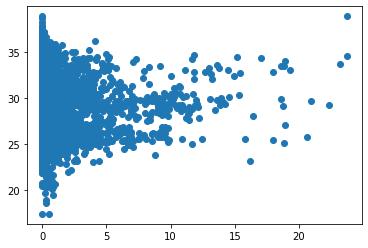

In [159]:
plt.scatter(df['LDAPS_PPT1'],df['Next_Tmax'])

LDAPS_PPT1 is not exactly inversely proportional to target Next_Tmax, max data lies within 0-5

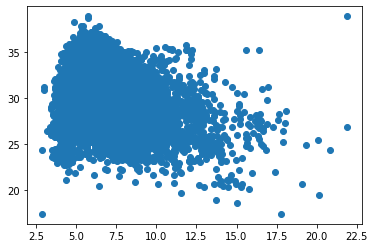

In [160]:
plt.scatter(df['LDAPS_WS'],df['Next_Tmax'])

LDAPS_WS is decreasing w.r.t to target Next_Tmax

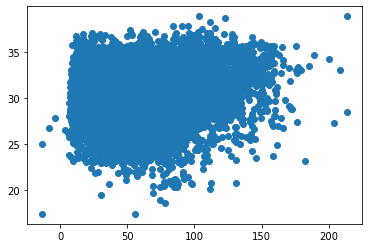

In [161]:
plt.scatter(df['LDAPS_LH'],df['Next_Tmax'])

LDAPS_LH is not exactly decreasing , but fixed at one position to target Next_Tmax

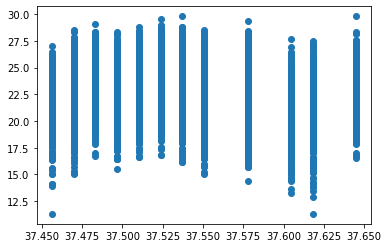

In [162]:
plt.scatter(df['lat'],df['Next_Tmin'])

lat is initially directly proportional and afterwards inversely proportional to target Next_Tmin

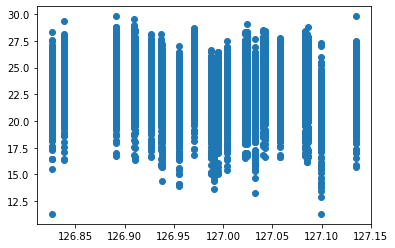

In [163]:
plt.scatter(df['lon'],df['Next_Tmin'])

lon is initially directly proportional and afterwards inversely proportional to target Next_Tmin

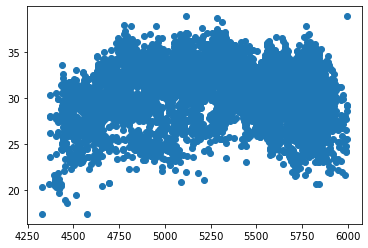

In [164]:
plt.scatter(df['Solar radiation'],df['Next_Tmax'])

Solar radiation is directly proportional and incresing and being constant at one position to target Next_Tmax

In [165]:
# clearly,datset has 7752 rows and 26 columns.
df.shape

(7752, 26)

In [166]:
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
count,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000,7750.000000
mean,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,7.467742,15.983871,2015.000000
std,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,0.530334,8.918647,1.414305
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,6.000000,1.000000,2013.000000
25%,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,7.000000,8.000000,2014.000000
50%,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,7.000000,16.000000,2015.000000
75%,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,8.000000,24.000000,2016.000000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,8.000000,31.000000,2017.000000


In [167]:
dfcor=df.corr()
dfcor

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
Present_Tmax,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,-0.215816,-0.145513,-0.142497,-0.110001,-0.100420,-0.121271,-0.101471,-5.277559e-02,9.074537e-03,-1.878551e-01,-1.060965e-01,-0.025557,0.613109,0.625252,1.473111e-01,-1.427487e-01,6.025443e-02
Present_Tmin,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,0.091439,-0.002839,-0.045091,0.114312,0.069095,-0.046645,-0.064394,-7.871497e-02,-4.372508e-02,-2.512571e-01,-1.467365e-01,0.053828,0.473868,0.799758,8.820983e-02,-1.068727e-01,3.771596e-02
LDAPS_RHmin,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,8.752301e-02,-7.660834e-02,1.026120e-01,1.243464e-01,0.244795,-0.442958,0.095830,-1.900426e-01,-6.355502e-02,-2.056410e-03
LDAPS_RHmax,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,1.967512e-01,2.579192e-02,1.780307e-01,2.206680e-01,0.149699,-0.286478,-0.072490,-1.184928e-01,-1.515333e-02,-1.427035e-01
LDAPS_Tmax_lapse,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-4.229788e-02,9.110723e-02,-1.797664e-01,-1.631227e-01,0.048111,0.836144,0.591535,9.794881e-02,-1.605526e-01,1.627829e-02
LDAPS_Tmin_lapse,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-9.672557e-02,-2.683105e-02,-1.964069e-01,-1.867535e-01,0.160443,0.593195,0.886964,2.352934e-02,-1.739656e-01,-4.723155e-03
LDAPS_WS,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,3.683553e-02,-5.975570e-02,1.919832e-01,1.724642e-01,0.122116,-0.346592,-0.097390,-1.124582e-01,-4.105466e-02,-1.122623e-01
LDAPS_LH,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,1.338695e-01,2.594779e-02,5.540187e-02,8.720337e-02,-0.047523,0.159324,-0.055895,6.629420e-02,-2.095731e-02,5.744957e-02
LDAPS_CC1,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-8.170208e-03,-6.876147e-03,-1.415893e-02,-2.085302e-02,0.218949,-0.457583,-0.011129,-2.105085e-01,-2.545140e-02,-6.683323e-02
LDAPS_CC2,-0.215816,0.091439,0.745443,0.391330,-0.523619,0.047727,0.261090,-0.264280,0.779683,1.000000,0.725813,0.527708,0.305975,0.478472,0.240134,0.159548,-1.504545e-03,-3.598575e-03,-1.288568e-02,-1.816098e-02,0.170903,-0.496251,0.031500,-1.650584e-01,-9.477723e-03,-4.348839e-02


<AxesSubplot:>

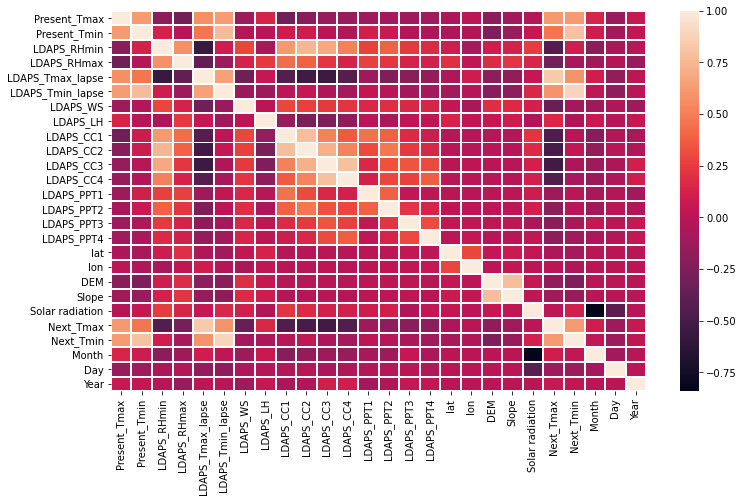

In [168]:
plt.figure(figsize=(12,7))
sns.heatmap(dfcor,linewidths=1)

<AxesSubplot:>

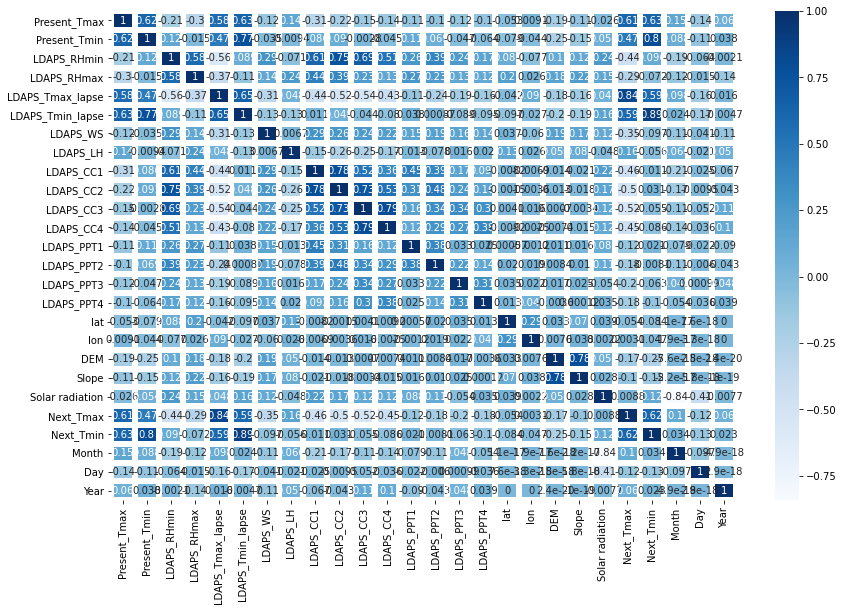

In [169]:
plt.figure(figsize=(14,9))
sns.heatmap(dfcor,cmap='Blues',annot=True,linewidths=5)

In [170]:
# Checking the skewness of the dataset
df.skew()

Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Month              -0.195864
Day                -0.008925
Year                0.000000
dtype: float64

In [171]:
# df.dropna means drop  all the rows which have null values 
df.dropna(inplace=True)

In [172]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Month               0
Day                 0
Year                0
dtype: int64

# Removing Outliers

In [173]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.35331763, 0.74802891, 0.10466029, ..., 2.77335883, 1.57877772,
        1.41176669],
       [0.72513836, 0.66472063, 0.3050523 , ..., 2.77335883, 1.57877772,
        1.41176669],
       [0.62403311, 0.0433998 , 0.54934444, ..., 2.77335883, 1.57877772,
        1.41176669],
       ...,
       [2.17321212, 2.53915704, 2.05008127, ..., 1.01021665, 1.57877772,
        1.42353686],
       [2.17321212, 2.28923218, 2.23473536, ..., 1.01021665, 1.57877772,
        1.42353686],
       [2.20691387, 2.41419461, 2.310467  , ..., 1.01021665, 1.57877772,
        1.42353686]])

In [174]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 6, 13, 13, ...,  1,  1,  5], dtype=int64))


In [175]:
# checking outliers values by putting an array
z[25][6]

3.911059950709196

In [176]:
z[26][13]

6.512507233943351

In [177]:
z[7581][1]

3.4138940296441835

In [178]:
# removing all outliers
df_new=df[(z<3).all(axis=1)]

In [179]:
df_new.shape

(6739, 26)

after removing outliers, we have lost almost 9-10 percent of data

# Removing Skewness

In [180]:
# Apply log transformation

In [181]:
df_new['LDAPS_WS']=np.log(df_new['LDAPS_WS'])

In [182]:
df_new['LDAPS_WS']=np.log(df_new['LDAPS_WS'])
df_new['DEM']=np.log(df_new['DEM'])
df_new['Slope']=np.log(df_new['Slope'])

# Seperating target and independent variable into x,y and z

In [183]:
y = df_new.Next_Tmax
z = df_new.Next_Tmin
x = df_new.drop(['Next_Tmax','Next_Tmin'],axis=1)

In [ ]:
# Using power transform tpo remove again skewness

In [184]:
from sklearn.preprocessing import power_transform
k=power_transform(x)
k=pd.DataFrame(k,columns=x.columns)

In [185]:
k

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Month,Day,Year
0,-0.472363,-0.834288,0.261441,0.348222,-0.674803,-0.357311,0.173405,0.349992,-0.307447,-0.425528,-0.460839,-0.512476,-0.52537,-0.484794,-0.461889,-0.414444,1.209342,-0.019684,1.849175,1.240254,1.891687,-2.482447,1.473998,-1.450726
1,0.671403,-0.752247,-0.170332,0.261118,-0.035627,0.109008,-0.567931,-0.166810,-0.348674,-0.192022,-0.474101,-0.532674,-0.52537,-0.484794,-0.461889,-0.414444,1.209342,0.504958,0.075872,-0.259337,1.431077,-2.482447,1.473998,-1.450726
2,0.558755,-0.030660,-0.440837,-0.717348,0.052156,0.361065,-0.249376,-1.378337,-0.429256,-0.165290,-0.222547,-0.443077,-0.52537,-0.484794,-0.461889,-0.414444,0.674418,0.844049,-0.341526,-0.859218,1.410511,-2.482447,1.473998,-1.450726
3,0.709202,0.013131,0.260328,1.375094,-0.088777,-0.215595,-0.599785,0.245926,-0.393954,-0.315683,-0.464009,-0.491694,-0.52537,-0.484794,-0.461889,-0.414444,2.004930,0.375867,0.104424,1.158172,1.387059,-2.482447,1.473998,-1.450726
4,0.484281,-0.628056,0.114346,0.186035,-0.302633,-0.143389,-0.535486,1.298111,-0.736780,-0.200399,-0.361649,-0.278264,-0.52537,-0.484794,-0.461889,-0.414444,0.138903,1.878165,-0.267624,-0.274620,1.396254,-2.482447,1.473998,-1.450726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,-2.169556,-2.206864,-2.637435,-1.363447,-0.767491,-2.135504,0.046671,-2.013062,-1.337812,-1.433488,-1.603486,-1.453999,-0.52537,-0.484794,-0.461889,-0.414444,0.138903,0.608761,-0.700140,-0.162611,-1.763704,1.010333,1.473998,1.419189
6735,-2.328654,-2.347046,-2.065781,-0.753410,-1.156337,-2.288364,-0.510851,0.685720,-1.248452,-1.471366,-1.603481,-1.339338,-0.52537,-0.484794,-0.461889,-0.414444,-0.673236,1.214868,-0.990082,-1.495527,-1.781247,1.010333,1.473998,1.419189
6736,-2.115551,-2.450543,-2.413137,-1.302260,-1.278823,-1.982204,-0.242185,0.421213,-1.493884,-1.108477,-1.603486,-1.492710,-0.52537,-0.484794,-0.461889,-0.414444,-0.131219,-1.249162,-1.588921,-1.353339,-1.779394,1.010333,1.473998,1.419189
6737,-2.115551,-2.242143,-2.710368,-1.457152,-1.049821,-1.996101,0.010021,-0.319269,-1.453370,-1.145833,-1.603486,-1.492710,-0.52537,-0.484794,-0.461889,-0.414444,-0.401932,-1.032985,-1.400517,-1.024065,-1.785446,1.010333,1.473998,1.419189


In [186]:
x=k

In [187]:
y.shape

(6739,)

In [188]:
x.skew()

Present_Tmax       -0.033180
Present_Tmin       -0.022294
LDAPS_RHmin        -0.014095
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.012837
LDAPS_Tmin_lapse   -0.027814
LDAPS_WS            0.002376
LDAPS_LH           -0.030736
LDAPS_CC1           0.065308
LDAPS_CC2           0.050023
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.089949
lon                -0.191511
DEM                 0.006271
Slope               0.032256
Solar radiation    -0.172156
Month              -0.087154
Day                -0.213871
Year                0.014854
dtype: float64

All the skewness have been removed

# train_test_split for target variable Next_Tmax

In [189]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=46)

# Scaling

In [190]:
# Using standard scaler for scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [191]:
# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

# calculate RMSLE (SCORE func).
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred - y)**2)) / len(y))**1/2

# SCORING func for Cross Validation (RandomizedSearchCV)
scorer = make_scorer(score_func = score, greater_is_better=True)

In [192]:
# Support Vector Machine
svm = SVR(gamma='scale')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(svm, score(y_pred,y_test))

SVR() 0.9993950884574027


In [193]:
# KNeighbors Regressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(knn, score(y_pred,y_test))

KNeighborsRegressor() 0.9994692836442768


In [194]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(dt, score(y_pred,y_test))

DecisionTreeRegressor() 0.9987759301439553


In [195]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(rf, score(y_pred,y_test))

RandomForestRegressor() 0.9994374923763534


# Hyper parameter tuning

In [196]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   6.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.004 total time=   5.8s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   6.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=   5.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.005 total time=   3.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.647 total time=   4.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.649 total time=   4.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   4.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.616 total time=   4.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=   4.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.749 total time=   3.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.183 total time=   7.6s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.176 total time=   3.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.168 total time=   4.7s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.176 total time=   8.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.934 total time=  13.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.925 total time=  13.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.907 total time=  12.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.915 total time=   9.4s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.929 total time=  12.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.927 total time= 2.8min
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.932 total time= 2.3min
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.917 total time= 2.9min
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [197]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVR(C=1000, gamma=0.01)


In [ ]:
# Support Vector Machine
svm = SVR(C=1000, gamma=0.01)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(svm, score(y_pred,y_test))

# Again using train_test_split for target variable Next_Tmin i.e z

In [199]:
x_train,x_test,z_train,z_test = train_test_split(x,z,test_size=0.3,random_state=43)

In [200]:
# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

# calculate RMSLE (SCORE func).
def score(z_pred,z):
    z_pred = np.log(z_pred)
    z = np.log(z)
    return 1 - ((np.sum((z_pred - z)**2)) / len(z))**1/2

# SCORING func for Cross Validation (RandomizedSearchCV)
scorer = make_scorer(score_func = score, greater_is_better=True)

In [201]:
# Support Vector Machine
svm = SVR(gamma='scale')
svm.fit(x_train,z_train)
z_pred = svm.predict(x_test)
print(svm, score(z_pred,z_test))

SVR() 0.9995300505122777


In [202]:
# KNeighbors Regressor
knn = KNeighborsRegressor()
knn.fit(x_train,z_train)
z_pred = knn.predict(x_test)
print(knn, score(z_pred,z_test))

KNeighborsRegressor() 0.9993151296658085


In [203]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(x_train,z_train)
z_pred = dt.predict(x_test)
print(dt, score(z_pred,z_test))

DecisionTreeRegressor() 0.9987981020225525


In [204]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train,z_train)
z_pred = rf.predict(x_test)
Final_mod = print(rf, score(z_pred,z_test))

RandomForestRegressor() 0.9994630327338907


# Saving the model

In [205]:
import joblib
joblib.dump(Final_mod,"FinalModel.pk1")

['FinalModel.pk1']